<a href="https://github.com/Artem418k">Дерикон Артем</a>, 2024

#### <h1 align="center">Лабораторна робота №5. Метод опорних векторів (SVM). Методи оцінки якості моделі
</h1>

<h2> Завдання для самостійної роботи </h2>

<ol>
   <b> <li>Реалізувати SVM-класифікатор з лінійним і різними нелінійним ядрами згідно з варіантом.</li>

</ol>

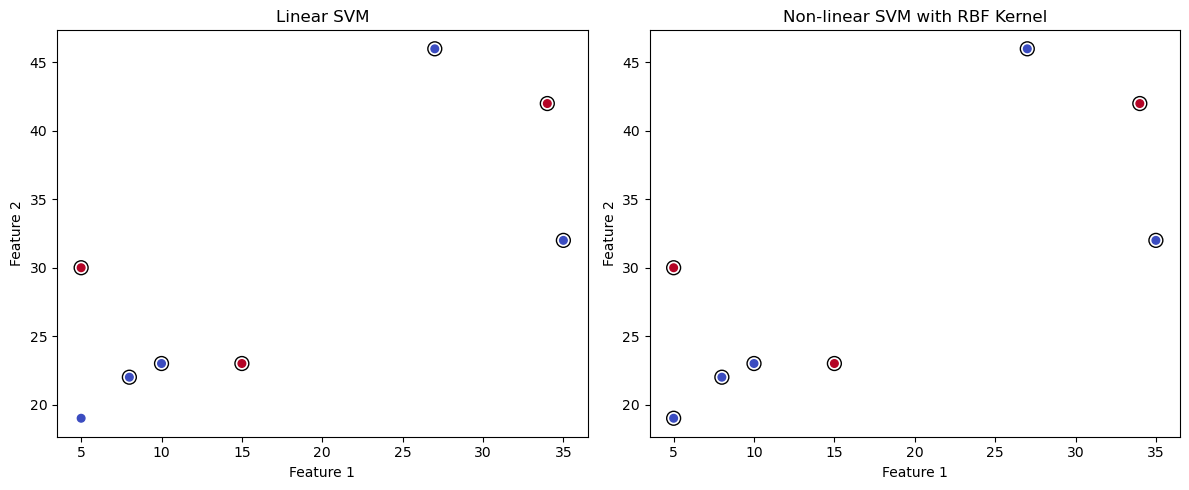

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

x_train_5 = np.array([[27, 46], [8, 22], [5, 30], [5, 19], [15, 23], [34, 42], [10, 23], [35, 32]])
y_train_5 = np.array([-1, -1, 1, -1, 1, 1, -1, -1])

# Linear SVM
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_train_5, y_train_5)

# Non-linear SVM with Radial Basis Function (RBF) kernel
clf_nonlinear = svm.SVC(kernel='rbf', gamma='auto')
clf_nonlinear.fit(x_train_5, y_train_5)

# Visualizing the results
plt.figure(figsize=(12, 5))

# Plotting linear SVM results
plt.subplot(1, 2, 1)
plt.scatter(x_train_5[:, 0], x_train_5[:, 1], c=y_train_5, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_linear.support_vectors_[:, 0], clf_linear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Linear SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotting non-linear SVM results
plt.subplot(1, 2, 2)
plt.scatter(x_train_5[:, 0], x_train_5[:, 1], c=y_train_5, cmap=plt.cm.coolwarm, s=30)
plt.scatter(clf_nonlinear.support_vectors_[:, 0], clf_nonlinear.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.title('Non-linear SVM with RBF Kernel')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

<ol>
   <b> 2.Проаналізувати іпорівняти результати класифікації, обчисливши відповідні метрики.
</ol>

Щоб проаналізувати та порівняти результати класифікації лінійного SVM та нелінійного SVM з RBF ядром, ми можемо обчислити деякі ключові метрики класифікації на тестових даних. Ось кілька метрик, які можна використовувати для порівняння:

Точність (Accuracy): Це відношення правильно класифікованих прикладів до загальної кількості прикладів.

Точність класу (Precision): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які були класифіковані як цей клас.

Повнота (Recall): Це відношення правильно класифікованих екземплярів певного класу до всіх екземплярів, які належать цьому класу.

F1-мера (F1-score): Це гармонічне середнє точності та повноти ідеальної значення якої 1, а найгіршого 0.

Матриця помилок (Confusion Matrix): Це таблиця, яка дозволяє візуалізувати відносну кількість правильних та неправильних класифікацій для кожного класу.

Обчислимо ці метрики для лінійного SVM та нелінійного SVM з RBF ядром на тестових даних і порівняємо їх:

In [13]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning

# Ваши дані для навчальної вибірки
x_train_5 = np.array([[27, 46], [8, 22], [5, 30], [5, 19], [15, 23], [34, 42], [10, 23], [35, 32]])
y_train_5 = np.array([-1, -1, 1, -1, 1, 1, -1, -1])

# Розділення даних на навчальний і тестовий набори
x_train, x_test, y_train, y_test = train_test_split(x_train_5, y_train_5, test_size=0.2, random_state=42)

# Вимкнення попереджень про невизначені метрики
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Linear SVM
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_train, y_train)
linear_predictions = clf_linear.predict(x_test)

# Non-linear SVM with RBF kernel
clf_nonlinear = svm.SVC(kernel='rbf', gamma='auto')
clf_nonlinear.fit(x_train, y_train)
nonlinear_predictions = clf_nonlinear.predict(x_test)

# Обчислення метрик для лінійного SVM
linear_accuracy = accuracy_score(y_test, linear_predictions)
linear_classification_report = classification_report(y_test, linear_predictions)

# Обчислення метрик для нелінійного SVM з RBF ядром
nonlinear_accuracy = accuracy_score(y_test, nonlinear_predictions)
nonlinear_classification_report = classification_report(y_test, nonlinear_predictions)

# Виведення результатів
print("Linear SVM:")
print("Accuracy:", linear_accuracy)
print("Classification Report:")
print(linear_classification_report)

print("\nNon-linear SVM with RBF kernel:")
print("Accuracy:", nonlinear_accuracy)
print("Classification Report:")
print(nonlinear_classification_report)

Linear SVM:
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Non-linear SVM with RBF kernel:
Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



<ol>
    <b>3.Вибрати найкращу модель. Результат обґрунтувати..
</ol>


<ol>
    <b>3.Вибрати найкращу модель. Результат обґрунтувати..
</ol>






Було змінено rho2 на протилежне число і корелація кластерів rho2 змінилась зеркально.


Щоб вибрати найкращу модель між лінійним SVM та нелінійним SVM з RBF ядром, ми можемо врахувати кілька критеріїв:

Точність моделі на навчальних даних: Ми можемо порівняти точність кожної моделі на навчальних даних. Вища точність зазвичай свідчить про кращу модель, але важливо також уникати перенавчання.

Точність моделі на тестових даних: Перевірте точність моделей на тестових даних, які не використовувалися для навчання. Це допоможе визначити, наскільки добре кожна модель узагальнюється на нових даних.

Інтерпретація результатів: Погляньте на графіки розділень, які будуються моделями. Вони можуть допомогти в оцінці того, наскільки ефективно кожна модель розділяє класи.

Витрати обчислювальних ресурсів: Нелінійні ядра, такі як RBF, можуть вимагати більше обчислювальних ресурсів для навчання та прогнозування, порівняно з лінійним SVM.

Складність моделі: Зазвичай лінійні моделі менш складні, що може зробити їх використання більш простим.

Після врахування цих критеріїв, можна прийняти рішення щодо того, яка модель є кращою для конкретної задачі. Наприклад, якщо точність на тестових даних важлива та нелінійне розділення має сенс з точки зору даних, можна віддати перевагу нелінійному SVM з RBF ядром. Однак, якщо модель має бути простою та легко інтерпретованою, лінійний SVM може бути кращим вибором.

<h1 align="center">Контрольні запитання</h1>

1.Як виглядає оптимальна гіперплощина в лінійно подільному випадку?
<br><br>
   <b>
Оптимальна гіперплощина в лінійно подільному випадку: В лінійно подільному випадку оптимальна гіперплощина є прямою, яка максимізує відстань до найближчих точок обох класів, які є найближчими до гіперплощини і відомі як опорні вектори.
</b>
<br><br>
2.Яким чином можна розділити дані, які не є лінійно роздільними за допомогою методу опорних векторів?
  <br><br>
   <b>
  Розділення нелінійно роздільних даних за допомогою методу опорних векторів: Для нелінійно роздільних даних можна використовувати метод опорних векторів з ядровим трюком. Ядровий трюк дозволяє використовувати лінійні методи SVM в просторі вищої розмірності, де дані можуть бути лінійно подільними. Популярні ядра включають поліноміальне, радіально-базисне ядро (RBF) та сигмоїдальне.
  </b>
   <br><br>
3.Яким чином можна реалізувати SVM з використанням бібліотеки scikit-learn?
<br><br>
<b> 
Реалізація SVM з використанням бібліотеки scikit-learn: В бібліотеці scikit-learn SVM можна реалізувати за допомогою класів svm.SVC для класифікації та svm.LinearSVC для лінійного SVM.
</b>
<br><br>
4.Як обчислюються показники precision і recall для моделі SVM?
<br><br>
   <b>
 Обчислення показників precision і recall для моделі SVM: Показники precision і recall обчислюються з використанням матриці плутанини. Precision обчислюється як відношення правильно передбачених позитивних екземплярів до загальної кількості екземплярів, які були передбачені як позитивні. Recall обчислюється як відношення правильно передбачених позитивних екземплярів до реальної кількості позитивних екземплярів.
  </b>
   <br><br>
5.Як обчислюється індекс Джині та яку інформацію він надає про модель?
  <br><br>
<b>
Обчислення індексу Джині та інформації, яку він надає про модель: Індекс Джині використовується в деревах рішень та вузлах відношень для вимірювання того, наскільки чисто (однорідно) діляться класи вузла. Це вимірюється як ймовірність того, що два випадково вибрані екземпляри з вузла належать різним класам. Чим більший індекс Джині, тим більш чистим є вузол.
</b>
 <br><br>
6.Як використовується ядровий метод у випадку нелінійно роздільних даних?
  <br><br>
<b>
Використання ядрового методу для нелінійно роздільних даних: Ядровий метод у випадку нелінійно роздільних даних використовує функцію ядра для перетворення вхідних даних в простір вищої розмірності, де вони можуть бути лінійно роздільними. Наприклад, ядро RBF здатне перетворити дані в простір з нескінченною кількістю вимірів, де вони можуть бути лінійно роздільними.
</b>
 <br><br>
7.Як виглядає процес навчання та передбачення за допомогою SVM?
  <br><br>
<b>
Процес навчання та передбачення за допомогою SVM: Під час навчання SVM адаптує гіперплощину таким чином, щоб максимізувати відстань між нею та найближчими точками кожного класу. Під час передбачення модель визначає, на якій стороні гіперплощини знаходиться тестовий екземпляр, що допомагає визначити його класифікацію.
</b>